# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ciudad lazaro cardenas
Processing Record 2 of Set 1 | howrah
Processing Record 3 of Set 1 | ellsworth
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | oum hadjer
Processing Record 6 of Set 1 | kaveripatnam
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | lorengau
Processing Record 12 of Set 1 | white oak
Processing Record 13 of Set 1 | la mira
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | happy valley-goose bay
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | san jeronimo de juarez
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | singarayakonda
Processing Record 21 of Set 1 | mai

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ciudad lazaro cardenas,17.9583,-102.2000,28.65,62,94,4.44,MX,1733693642
1,howrah,22.5892,88.3103,18.00,72,20,1.54,IN,1733693644
2,ellsworth,44.5434,-68.4195,1.59,92,100,2.06,US,1733693645
3,port-aux-francais,-49.3500,70.2167,2.23,98,100,12.93,TF,1733693646
4,oum hadjer,13.2954,19.6966,25.57,21,24,6.10,TD,1733693647


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ciudad lazaro cardenas,17.9583,-102.2000,28.65,62,94,4.44,MX,1733693642
1,howrah,22.5892,88.3103,18.00,72,20,1.54,IN,1733693644
2,ellsworth,44.5434,-68.4195,1.59,92,100,2.06,US,1733693645
3,port-aux-francais,-49.3500,70.2167,2.23,98,100,12.93,TF,1733693646
4,oum hadjer,13.2954,19.6966,25.57,21,24,6.10,TD,1733693647


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

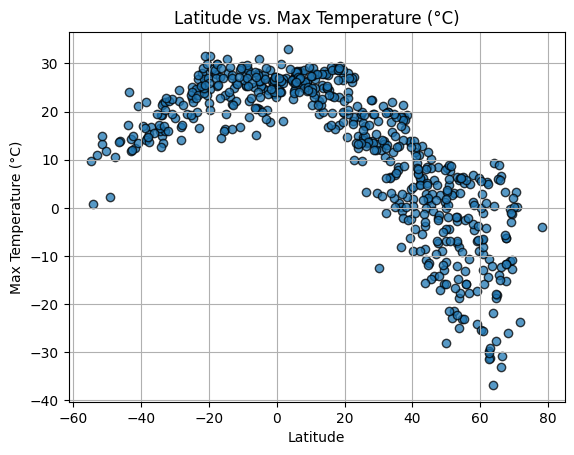

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.75)


# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

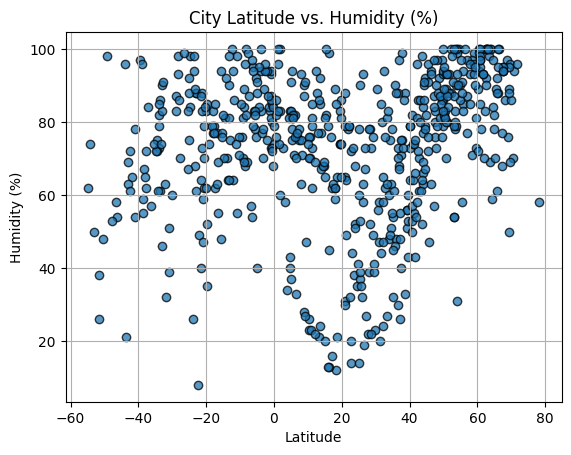

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

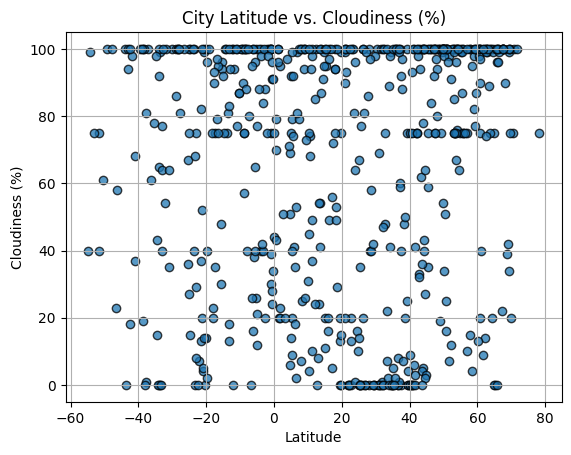

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

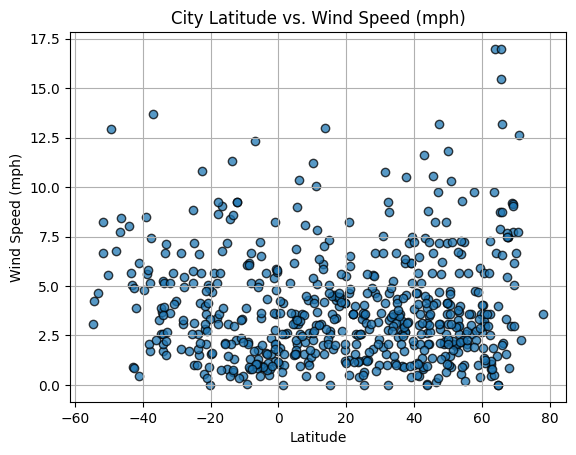

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    reg_line = slope * x_values + intercept
    plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.75)
    plt.plot(x_values, reg_line, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (min(x_values), max(y_values)), fontsize=12, color="red")
    plt.grid(True)
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ciudad lazaro cardenas,17.9583,-102.2000,28.65,62,94,4.44,MX,1733693642
1,howrah,22.5892,88.3103,18.00,72,20,1.54,IN,1733693644
2,ellsworth,44.5434,-68.4195,1.59,92,100,2.06,US,1733693645
4,oum hadjer,13.2954,19.6966,25.57,21,24,6.10,TD,1733693647
5,kaveripatnam,12.4167,78.2333,19.54,94,100,0.45,IN,1733693649


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port-aux-francais,-49.3500,70.2167,2.23,98,100,12.93,TF,1733693646
7,waitangi,-43.9535,-176.5597,17.12,96,100,8.05,NZ,1733693651
8,blackmans bay,-43.0167,147.3167,14.29,69,94,0.89,AU,1733693652
10,lorengau,-2.0226,147.2712,28.61,75,100,2.37,PG,1733693655
16,margaret river,-33.9500,115.0667,14.89,82,0,5.26,AU,1733693663


###  Temperature vs. Latitude Linear Regression Plot

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp "], "Latitude", "Max Temp",
                       "Northern Hemisphere: Latitude vs Max Temp")

KeyError: 'Max Temp '

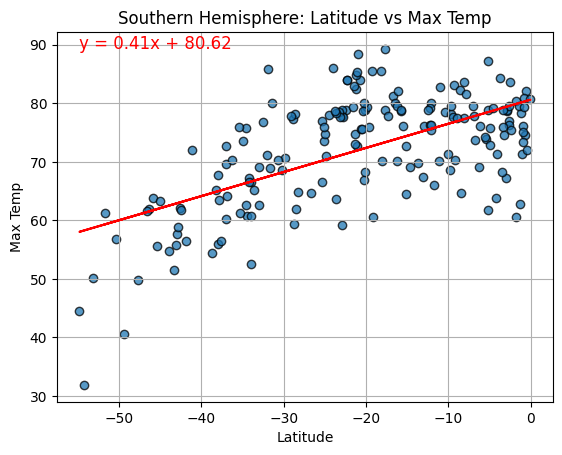

In [23]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp",
                       "Southern Hemisphere: Latitude vs Max Temp")

**Discussion about the linear relationship:**

With 0 latitude representing the equator, it is clear based on the linear relationship that the closer one gets to the equator, the higher the max temperature of the cities on average.

### Humidity vs. Latitude Linear Regression Plot

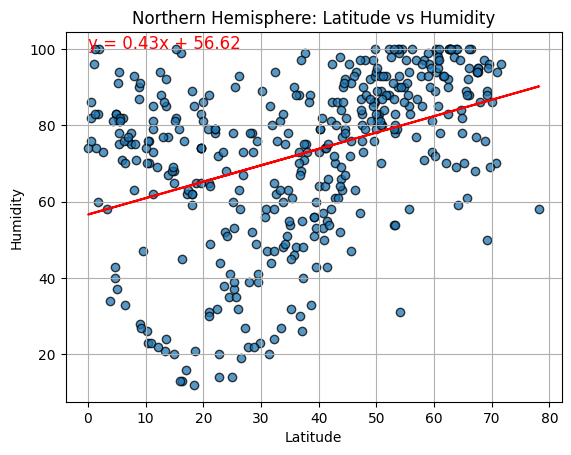

In [16]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity",
                       "Northern Hemisphere: Latitude vs Humidity")

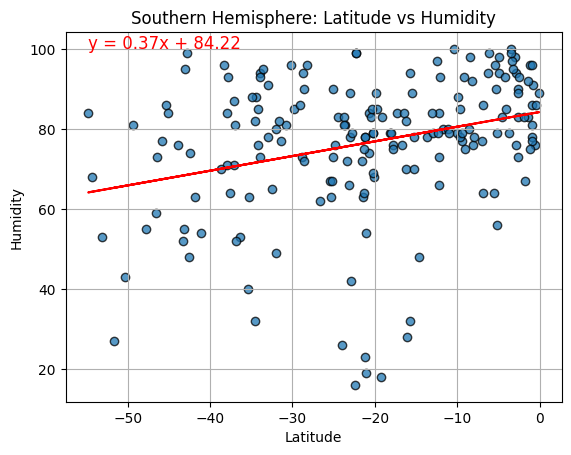

In [26]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity",
                       "Southern Hemisphere: Latitude vs Humidity")

**Discussion about the linear relationship:** 

As we meove from lower latitudes to higher latitudes, the linear relationship suggests that humidity tends to increase. The relationship is not particularly strong, however. The lineare relationship does not indicate that latitude is the sole determinant of humidity.

### Cloudiness vs. Latitude Linear Regression Plot

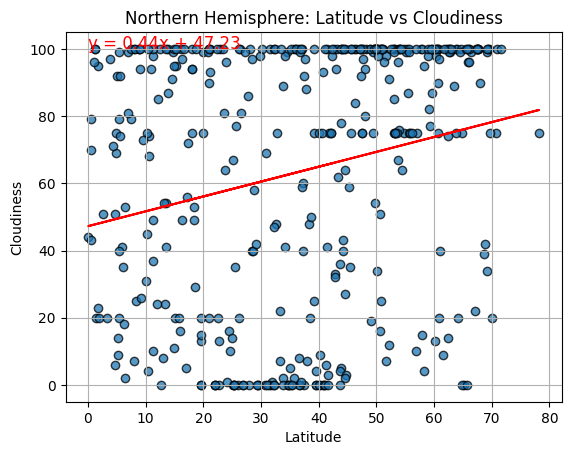

In [17]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness",
                       "Northern Hemisphere: Latitude vs Cloudiness")

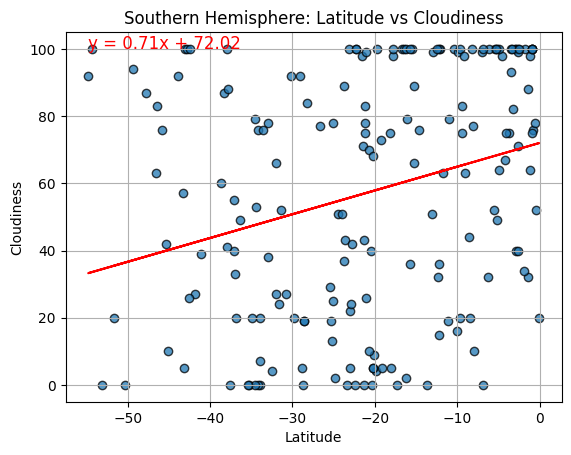

In [28]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness",
                       "Southern Hemisphere: Latitude vs Cloudiness")

**Discussion about the linear relationship:**
The relationship between the graphs clearly shows that an increase in altitude directly impacts the cloudiness of a region. There are many outliers which indicates that there are many more factors inmpacting it as well.

### Wind Speed vs. Latitude Linear Regression Plot

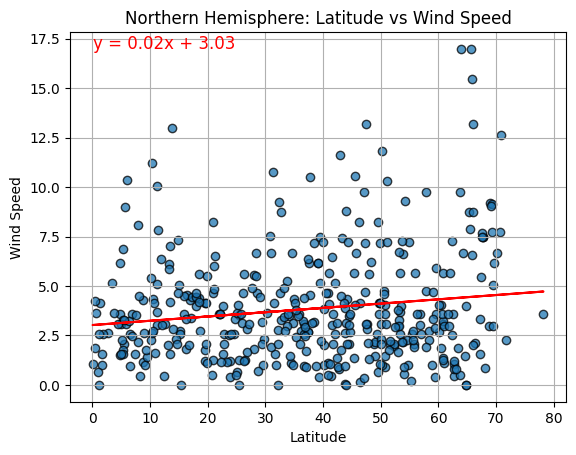

In [18]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed",
                       "Northern Hemisphere: Latitude vs Wind Speed")

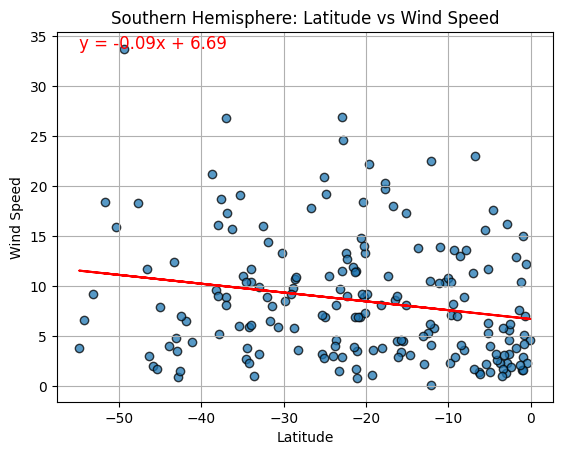

In [30]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed",
                       "Southern Hemisphere: Latitude vs Wind Speed")

**Discussion about the linear relationship:** 
The relationship between latitdue and wind speed is week. There are only small positive or negative effects. Although there is a slight increase in wind speed as latitude increases in the Norhtern Hemisphere and a slight decrease in wind speed as the latitude increases in the Southern Hemisphere, there is no drastic change.